# 任务一：一维K中心算法的实现


## 实现k中心算法:计算每个点的距离，找出cluster，然后再转化为计算最小值的问题，求出距离中心最小的那个坐标

Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 253 ('font.family:  sans-serif')
Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 261 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 404 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


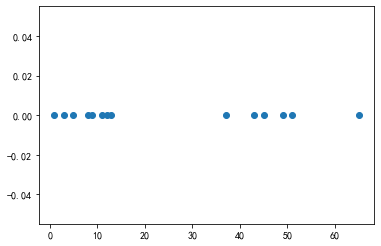

In [1]:
# 输入 人的年龄 组数k 初始中心
# 输出 类的中心，类的元素
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 输入部分
ages = np.array([1, 3, 5, 8, 9, 11, 12, 13, 37, 43, 45, 49, 51, 65])
k = 3

centers_new = [1, 20, 40]  # 迭代起点 实际实现时可以随机选择

# 探索部分
ages_series = pd.Series(ages)
plt.scatter(ages_series, np.zeros(len(ages_series)))  # 画图以后

# 距离表的数据结构
dis_to_cent = np.zeros((len(ages), k))


### 核心代码：centers_new[ii] = cluster[np.argmin(abs(cluster-round(cluster.mean())))]

In [2]:
centers = None
while centers_new!= centers:
# 重复部分 这个需要手动重复，请大家改成自动重复或确定收敛条件
    centers = centers_new.copy()  # 注意python的赋值过程，进行展开讲解，== is 和复制方式
    for ii in range(k):
        dis_to_cent[:, ii] = np.abs(ages - centers[ii])

    clusters = dis_to_cent.argmin(axis=1)

    for ii in range(k):
        cluster = ages[clusters == ii]
        centers_new[ii] = cluster[np.argmin(abs(cluster-round(cluster.mean())))]
        # centers_new[ii] = round(cluster.mean())

print(centers, centers_new)
print('centers_new==centers?', centers_new == centers)
print()


[3, 11, 49] [3, 11, 49]
centers_new==centers? True



## 两种方法的区别：1，原始的方法计算cluster中心时候，形成的聚类中心有可能是已经存在的点，也可能是不存在的点，当是不存在的点的时候，就是一个新的点，然后再次计算聚类中心，当计算出来新的聚类中心的时候，上一次计算出来的聚类中心就会消失。2，当是K中心算法时，就会自动选择已经存在的点当作聚类中心，这样更不容易受到噪声的影响。

# 任务二：K均值调包


### 导入包

In [2]:
from sklearn.cluster import KMeans   # 算法
from sklearn.datasets import load_iris     # 数据集
from sklearn.model_selection import train_test_split    # 数据集划分
from sklearn.metrics import accuracy_score     #评估
import matplotlib.pyplot as plt
import seaborn as sns

Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 253 ('font.family:  sans-serif')
Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 261 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file WindowsPath('C:/ProgramData/Anaconda3/lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 404 ('axes.unicode_minus: True  # use Unicode for the minus symbol rather than hyphen.  See')


In [3]:
iris = load_iris()    # 加载数据集

In [4]:
# 获取特征值和目标值 
X = iris.data[:, 1:3]
Y = iris.target

In [5]:
# 数据分割，测试集为0.2，随机种子2021
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2021)

In [6]:
# KMeans算法设置三个中心，随机种子为2021，训练加预测
y_pre = KMeans(n_clusters=3, random_state=2021).fit_predict(x_train)
print("训练集的预测值为：",y_pre)
print("模型的准确率为：", accuracy_score(y_train, y_pre))

训练集的预测值为： [0 0 1 2 0 0 2 1 2 0 0 2 1 0 2 2 2 2 0 0 2 1 2 1 0 1 0 0 2 1 1 2 1 0 0 2 0
 1 1 2 0 2 2 0 2 1 1 1 2 1 0 0 1 2 0 0 0 0 0 2 1 0 2 1 2 0 0 1 0 2 2 1 0 0
 1 1 0 0 2 1 0 2 1 1 1 2 1 0 2 0 1 0 1 2 1 2 2 0 0 0 1 0 2 2 1 1 2 1 0 2 0
 1 0 1 0 2 2 0 0 2]
模型的准确率为： 0.3


In [7]:
def Kmeans_fun(k):
    # 实例化一个估计器
    estimator = KMeans(n_clusters=k)
    # y_pre = KMeans(n_clusters=k, random_state=2021).fit_predict(X)
    estimator.fit(x_train)
    y_pre = estimator.predict(X)
    return y_pre
# y_pre = KMeans.predict(x_test)

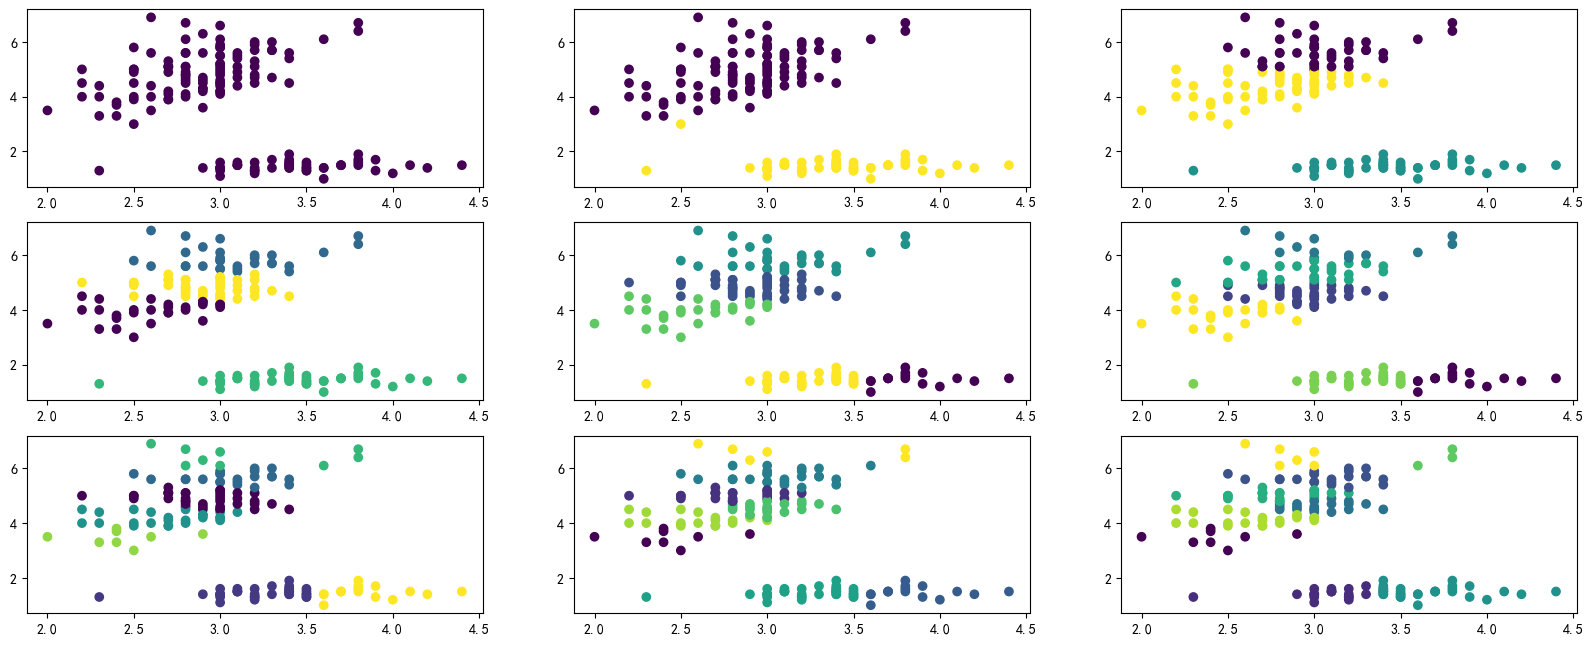

In [8]:
cou = 1
plt.figure(figsize=(20, 8), dpi=100)
for i in range(1, 10):
#     print(i)
    y_pre = Kmeans_fun(i)
#     print(y_pre)
    plt.subplot(330 + cou)
    plt.scatter(X[:, 0], X[:, 1], c=y_pre)
    cou += 1
    # print(y_pre)

plt.show()

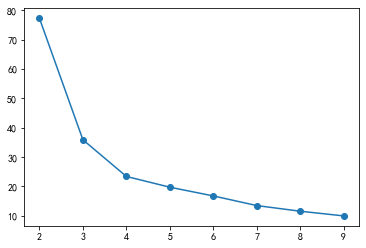

In [12]:
SSE = []
for i in range(2, 10):
    estimator = KMeans(n_clusters=i)
    estimator.fit(x_train, y_train)
    SSE.append(estimator.inertia_)

X = range(2,10)
plt.scatter(X, SSE)
plt.plot(X, SSE)

In [ ]:
# def plt_kmeans(k):
#     plt.figure(figsize=(20, 8), dpi=100)
#     plt.scatter(x_train[:,0], x_train[:, 1], c=y_train, marker='*')

In [50]:
# plt.figure(figsize=(20, 8), dpi=100)
# plt.scatter(x_train[:,0], x_train[:, 1], c=y_train, marker='*')

In [49]:
# y_train

In [48]:
# sns.scatterplot(x_train[:,0], x_train[:, 1], hue=y_train,palette="Set2")

In [10]:
x_train.shape

(120, 2)